# Expirementation of training of a After State Player  trained with themselves

## 1. Initialization

### 1.1. Importation of modules and functions

We start by import all important modules and functions that we can find in the link https://github.com/fcarsten/tic-tac-toe/tree/master/tic_tac_toe 

In [1]:
%matplotlib inline
import random as rd
import matplotlib
import numpy as np

import matplotlib.pyplot as plt

from tic_tac_toe.Board import Board, GameResult, CROSS, NAUGHT, EMPTY
from tic_tac_toe.Player import Player
from tic_tac_toe.RandomPlayer import RandomPlayer
from tic_tac_toe.MinMaxAgent import MinMaxAgent
from tic_tac_toe.RndMinMaxAgent import RndMinMaxAgent
from tic_tac_toe.TabularQPlayer import TQPlayer
from tic_tac_toe.ASPlayer import ASPlayer
from tic_tac_toe.TQ_ASPlayer import TQ_ASPlayer
from tic_tac_toe.AS_Symetric import AS_symPlayer



from tic_tac_toe.Board import Board, GameResult, CROSS, NAUGHT, EMPTY
from util2 import battle

## 2. Experiment of earning of a AS Player of other players

### 2.1. Let define a new function experiment

This particular function takes as parameters 2 players and calculates the the average performance of each player for 10 series of 10 battles where each battle has defaultly 100 games and output.

In [2]:
def experiments(p1: Player, p2: Player, v = AS_symPlayer(), w = TQ_ASPlayer(), y=TQPlayer(), z=ASPlayer(),
                num_battles = 100, num_games_train = 10, series =11, num_games_eval = 100,loc='best'):
    
   
    s_p1win = []
    s_p2win = []
    s_draw = []
    
    
    for k in range(series):
        
        p1_wins = []
        p2_wins = []
        draws = []
        count = []    

        for i in range(num_battles):
            p1win, p2win, draw = battle(p1, p2,v,w,y,z, num_games_train,num_games_eval, True)
            p1_wins.append(p1win)
            p2_wins.append(p2win)
            draws.append(draw)
            #count.append(i)
            
        s_p1win.append(p1_wins)
        s_p2win.append(p2_wins)
        s_draw.append(draws)
        
    data_p1 = np.average(np.array(s_p1win), axis = 0)
    std_p1 = np.std(np.array(s_p1win), axis=0)
    
    data_p2 = np.average(np.array(s_p2win), axis = 0)
    std_p2 = np.std(np.array(s_p2win), axis=0)
    
    data_draw = np.average(np.array(s_draw), axis = 0)
    std_draw = np.std(np.array(s_draw), axis=0)
    
    x = np.arange(num_battles)    
    plt.title('Agents Evalution ')
    plt.ylabel('Battle outcomes in %')
    plt.xlabel('Battles')
    plt.errorbar(x, data_draw, yerr=std_draw,  label='Mean Draw')
    plt.errorbar(x,data_p1, yerr=std_p1, label='P1 mean wins')
    plt.errorbar(x,data_p2, yerr=std_p2, label='P2 mean wins')
    plt.legend( shadow=True, fancybox=True, framealpha =0.7,bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

### 2.2. We used the following battle function

## 3. Experiment of training against the Random Player for the AS Player and TQ Player

### 3.1. When they are coming second against the Random Player

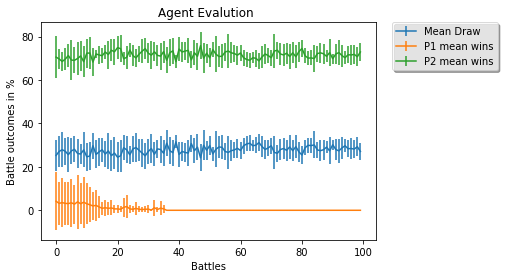

In [3]:
Rdlayer = RandomPlayer()
AsPlayer = TQ_ASPlayer()
experiments(Rdlayer, AsPlayer)

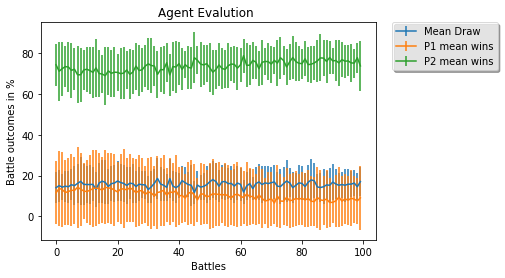

In [4]:
Rdlayer = RandomPlayer()
TsPlayer = TQPlayer()
experiments(Rdlayer, TsPlayer)

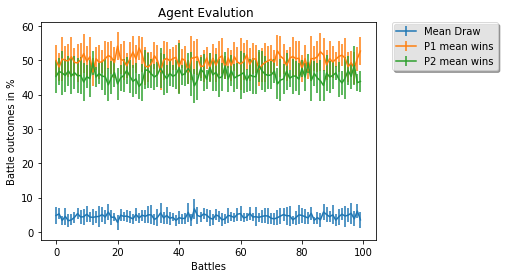

In [4]:
Rdlayer = RandomPlayer()
TsPlayer = ASPlayer()
experiments(Rdlayer, TsPlayer)

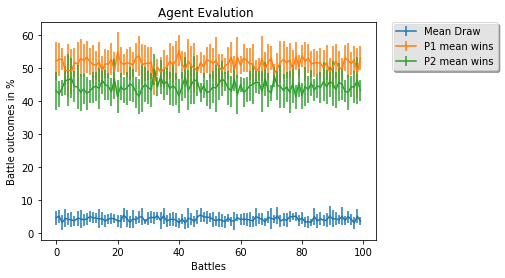

In [9]:
Rdlayer = RandomPlayer()
AsPlayer = ASPlayer()
experiments(Rdlayer, AsPlayer)

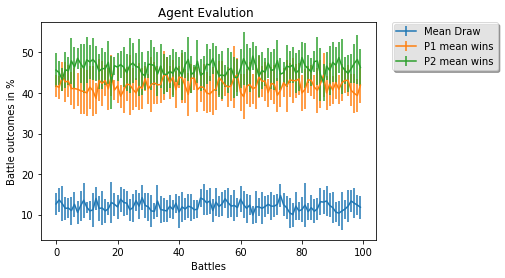

In [5]:
Rdlayer = RandomPlayer()
TsPlayer = AS_symPlayer()
experiments(Rdlayer, TsPlayer)

We notice that the TQ Player is performing well than the AS Player. The AS Palyer is behaving like a Random Player even after training with itself.

### 3.2. When they are going first against the Random Player

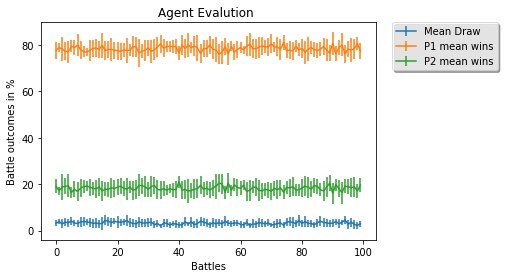

In [6]:
Rdlayer = RandomPlayer()
AsPlayer = ASPlayer()
experiments(AsPlayer, Rdlayer)

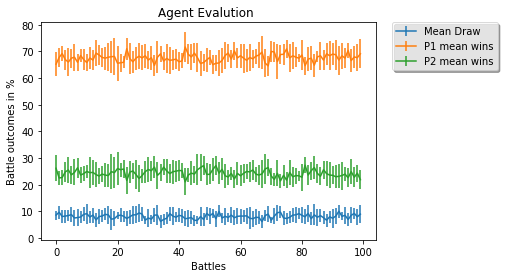

In [7]:
Rdlayer = RandomPlayer()
AsPlayer = AS_symPlayer()
experiments(AsPlayer, Rdlayer)

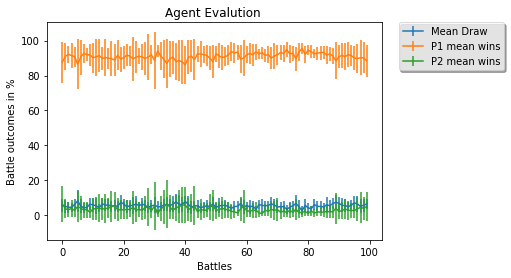

In [8]:
Rdlayer = RandomPlayer()
TsPlayer = TQPlayer()
experiments(TsPlayer, Rdlayer)

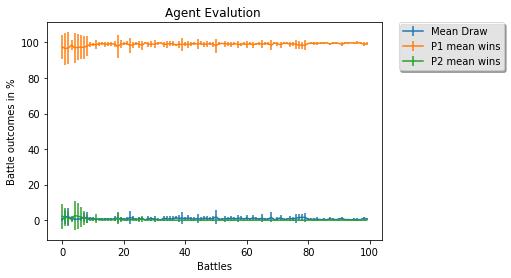

In [9]:
Rdlayer = RandomPlayer()
TsPlayer = TQ_ASPlayer()
experiments(TsPlayer, Rdlayer)

We notice the same thing as above. TQ Player is performing better

## 4. Experiment with the MinMax

### 4.1. When they are going second

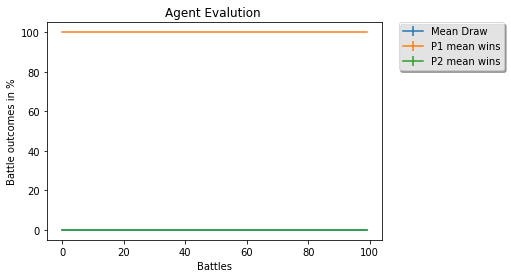

In [10]:
MinMaxplayer = MinMaxAgent()
AsPlayer = ASPlayer()
experiments(MinMaxplayer, AsPlayer)

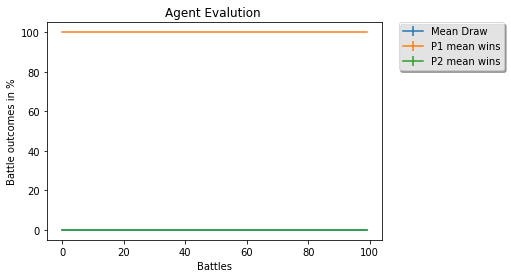

In [11]:
MinMaxplayer = MinMaxAgent()
AsPlayer = AS_symPlayer()
experiments(MinMaxplayer, AsPlayer)

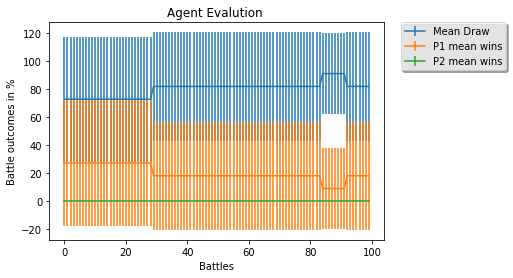

In [12]:
MinMaxplayer = MinMaxAgent()
TqPlayer = TQPlayer()
experiments(MinMaxplayer, TqPlayer)

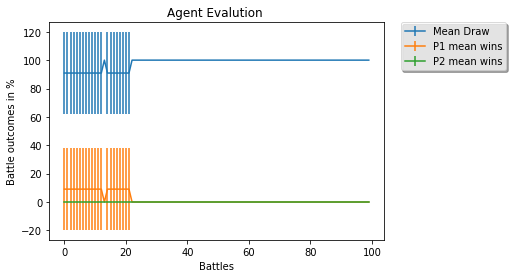

In [13]:
MinMaxplayer = MinMaxAgent()
TqPlayer = TQ_ASPlayer()
experiments(MinMaxplayer, TqPlayer)

The AS Player is still not playing optimally against after itself training

### 4.2. When they are going first

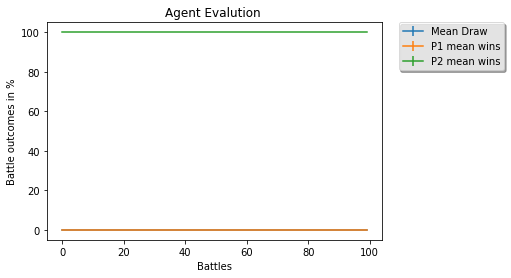

In [14]:
MinMaxplayer = MinMaxAgent()
AsPlayer = ASPlayer()
experiments(AsPlayer, MinMaxplayer)

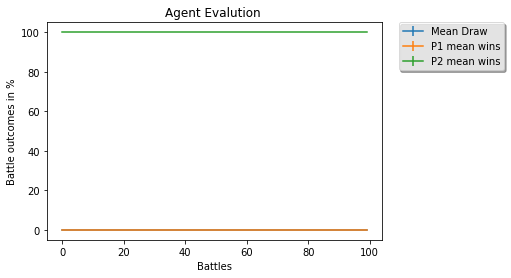

In [18]:
MinMaxplayer = MinMaxAgent()
AsPlayer = AS_symPlayer()
experiments(AsPlayer, MinMaxplayer)

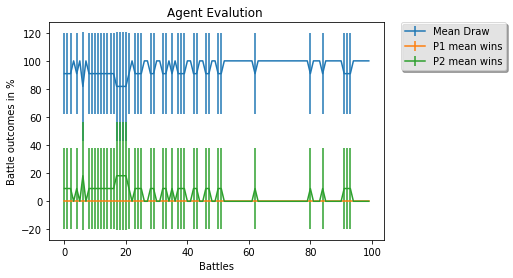

In [16]:
MinMaxplayer = MinMaxAgent()
TqPlayer = TQPlayer()
experiments(TqPlayer, MinMaxplayer)

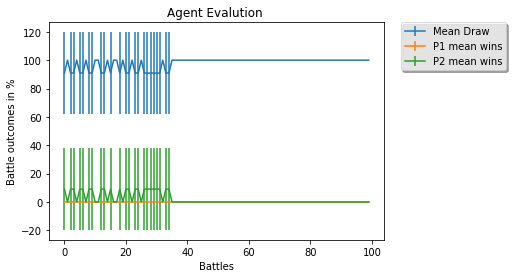

In [17]:
MinMaxplayer = MinMaxAgent()
TqPlayer = TQ_ASPlayer()
experiments(TqPlayer, MinMaxplayer)

The same result here

## 5. Experiment  with the random MiniMax Player

### 5.1. When they are coming second

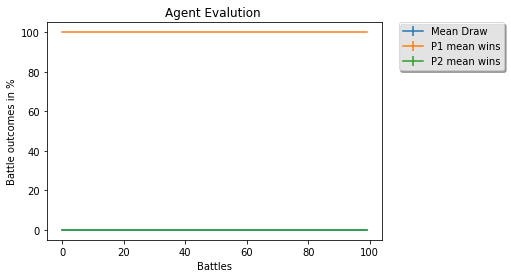

In [9]:
RdMinMaxplayer = RndMinMaxAgent()
AsPlayer = ASPlayer()
experiments(RdMinMaxplayer, AsPlayer)

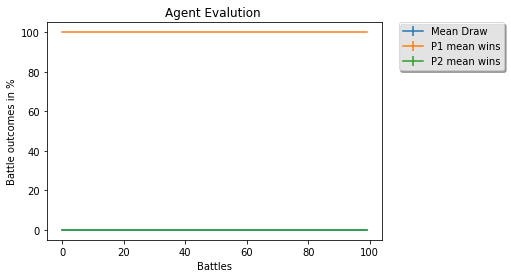

In [19]:
RdMinMaxplayer = RndMinMaxAgent()
TqPlayer = AS_symPlayer()
experiments(RdMinMaxplayer, TqPlayer)

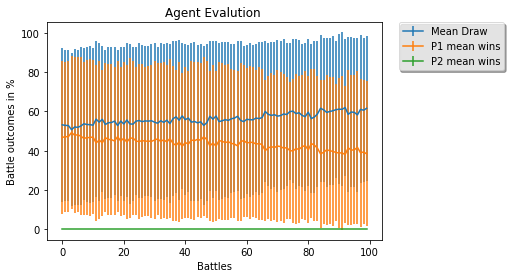

In [20]:
RdMinMaxplayer = RndMinMaxAgent()
TqPlayer = TQPlayer()
experiments(RdMinMaxplayer, TqPlayer)

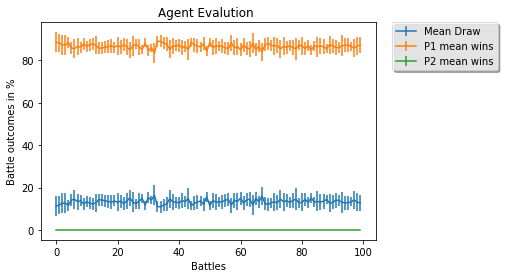

In [21]:
RdMinMaxplayer = RndMinMaxAgent()
TqPlayer = TQ_ASPlayer()
experiments(RdMinMaxplayer, TqPlayer)

TQ Player is improving its stategy but The As Player is still worst

### 5.2. When they are going first

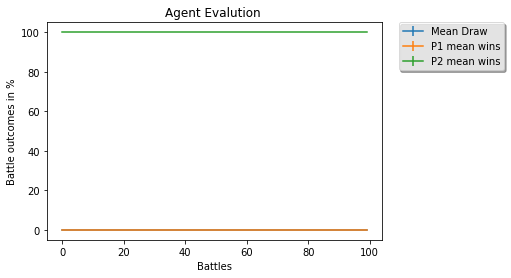

In [12]:
RdMinMaxplayer = RndMinMaxAgent()
AsPlayer = ASPlayer()
experiments(AsPlayer, RdMinMaxplayer)

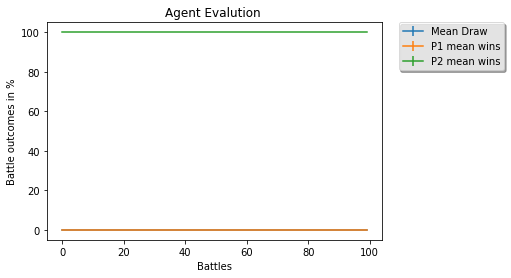

In [22]:
RdMinMaxplayer = RndMinMaxAgent()
AsPlayer = AS_symPlayer()
experiments(AsPlayer, RdMinMaxplayer)

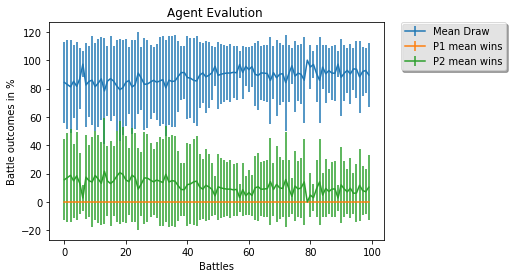

In [23]:
RdMinMaxplayer = RndMinMaxAgent()
TqPlayer = TQPlayer()
experiments(TqPlayer, RdMinMaxplayer)

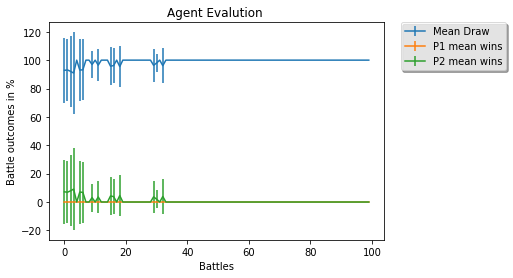

In [24]:
RdMinMaxplayer = RndMinMaxAgent()
TqPlayer = TQ_ASPlayer()
experiments(TqPlayer, RdMinMaxplayer)

The same resut as above

## 6. Conclusion

After a self training, the TQ Player was able to improving is strategy. But the AS Plyer wasn't able to improve itself against other opponents.

In [ ]:
def battle(player1: Player, player2: Player, y,z, num_games_train: int = 100, num_games_eval: int = 100000,  silent: bool = False): ## Added function
    board = Board()
    draw_count = 0
    cross_count = 0
    naught_count = 0
    for _ in range(num_games_train):
        
        if type(player1) == type(y):      
            play_train(board, player1, y)
        if type(player2) == type(y):      
            play_train(board, y, player2)
            
        if type(player1) == type(z):      
            play_train(board, player1, z)
        if type(player2) == type(z):      
            play_train(board, z, player2)
     
    for _ in range(num_games_eval):
            
        result = play_eval(board, player1, player2)
        if result == GameResult.CROSS_WIN:
            cross_count += 1
        elif result == GameResult.NAUGHT_WIN:
            naught_count += 1
        else:
            draw_count += 1

    return cross_count, naught_count, draw_count
